In [87]:
import numpy as np
import pandas as pd
import os
import sklearn
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


import numpy as np
import pandas as pd
import os
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import metrics
from sklearn.preprocessing import StandardScaler

# import evalml
# from evalml.automl import AutoMLSearch



from sklearn.ensemble import BaggingClassifier  
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import metrics
from keras import backend as K


import pickle

In [85]:
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("myopia.csv", sep=";")
df.head(7)

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1995,0,6,0,1.744,22.14,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,7,1993,0,6,1,0.683,22.33,3.186,3.654,15.49,12,7,2,1,8,36,0,1


В работе используется датасет исследования Orinda (Longitudinal Study of Myopia (OLSM)).

__Цель проекта:__ построить систему прогнозирования развития близорукости у школьников в зависимости от исходной рефракции, зрительной нагрузки и наследственности.

__Практическая ценность:__ Распространенность близорукости растет во всем мире, близорукость высокой степени неблагоприятно влияет на качество жизни, здоровье и социально-экономическое благополучие человека. Анализ данных, создание калькуляторов риска позволит отбирать группы с особо высоким риском и проводить профилактику.

__Целевая переменная__: На данном этапе я рассматриваю вопрос как задачу бинарной классификации - разовьется ли у ребенка близорукость(1) или нет(0).
Метрики - f1, так как классы несбалансированы (AUC в данном случае может приводить к ошибочным результатам). 


Так как планируется использовать данную информацию для прогнозирования индивидуального риска миопии у отдельных пациентов, принято решение удалить показатели биометрии (передне-задняя ось, толщина хрусталика и другие показатели, которые пациент не сможет самостоятельно найти или которые не всегда измеряют на плановых осмотрах).

Также удалены данные об id и годе исследования, как не несущие дополнительной информации.

__ABOUT THE PROJECT__

The Orinda Longitudinal Study of Myopia (OLSM) dataset is used in the project.

Project Objective: To build a system for predicting the development of myopia in schoolchildren based on initial refraction, visual load, and heredity.

Practical Value: The prevalence of myopia is increasing worldwide, and high myopia has a detrimental impact on quality of life, health, and socio-economic well-being. Analyzing the data and creating risk calculators will help identify groups at high risk and implement preventive measures.

Target Variable: At this stage, I am considering the question as a binary classification task: whether a child will develop myopia (1) or not (0). The evaluation metrics will be f1-score, as the classes are imbalanced (AUC may lead to misleading results in this case).

Since the information is intended to be used for predicting individual myopia risk in specific patients, it was decided to remove biometry measurements (anterior-posterior axis, lens thickness, and other measurements that patients cannot obtain independently or that are not always measured during routine examinations).

Additionally, the data regarding IDs and the year of the study were removed as they do not carry any additional information.






- SPHEQ - Spherical Equivalent Refraction which is a measure of the eye's effective focusing power. 

- AL – Axial Length measured in millimeters (mm) it is the length of the eye from front to back

- ACD - Anterior Chamber Depth measured in millimeters (mm) the length from front to back of the aqueous-containing space of the eye between the cornea and the iris

- LT - Lens Thickness measured in millimeters (mm) the length from front to back of the crystalline lens.

- VCD - Vitreous Chamber Depth measured in millimeters (mm) it’s the length from front to back of the aqueous-containing space of the eye in front of the retina. 

The number of hours per week a child spent doing physical activity including sports or outdoor activities outside of school is listed under SPORTHR. READHR is the number of hours per week a child spent reading for enjoyment outside of school. COMPHR is the number of hours per week a child spent playing computer and/or video games or working on a computer outside of school. STUDYHR is the number of hours a child spent studying or reading for school assignments outside of school. TVHR is the number of hours a child spent watching television per week. 
DIOPTERHR is the composite of near-sight/near-work activities in hours per week calculated as DIOPTERHR = 3× (READHR + STUDYHR) + 2 × COMPHR + TVHR

MOMMY indicates a 0 if the child’s mother did not have myopia and 1 if the child’s mother had myopia.
DADMY indicates a 0 if the child’s father did not have myopia and a 1 if the child’s father had myopia.

SOURCE: Hosmer, D.W., Lemeshow, S. and Sturdivant, R.X. (2013) Applied Logistic Regression: Third Edition

In [4]:
df.drop(['ID','STUDYYEAR', 'AL', 'ACD', 'LT', 'VCD'], axis = 1, inplace = True)

In [5]:
df.MYOPIC.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

__План экспериментов__:
1) добавить столбцы миопии у одного из родителей и ни у одного из родителей\
2) добавить столбец разделения степени исходной гиперметропии. Как известно, остаточная гиперметропия (сфероэквивалент рефракции более одной диоптрии является защитным фактором в предотвращении миопии, которая проявляется избыточным ростом глаза)\
3) добавить столбец свободного времени в неделю, который рассчитывается как [105 - количество часов чтения, работы за компьютером, учебы и просмотра телевизора в неделю], где 105 - примерная цифра времени бодрствования за вычетом 9-часового сна (24 - 9)* 7\
4) Так как датасет крайне небольшой (618 записей), и классы несбалансированы [537/81] можно применить SMOTE\
5) Эксперименты с параметрами нейросети.


__Experiments plan__:
1. Add columns for parental myopia, indicating whether one or both parents have myopia.\
2. Add a column for the classification of initial hyperopia degree. It is known that residual hyperopia (refractive spherical equivalent greater than one diopter) is a protective factor against myopia progression, which is associated with excessive eye elongation.\
3. Add a column for free time per week, calculated as [105 - hours spent on reading, computer work, studying, and television viewing per week], where 105 is an approximate estimate of waking hours per week, subtracting 9 hours of sleep per day (7 days * (24 hours - 9 hours)).\
4. Since the dataset is very small (618 records) and the classes are imbalanced [537 non-myopic / 81 myopic], SMOTE (Synthetic Minority Over-sampling Technique) can be applied to address this issue.\
5. Conduct experiments with neural network parameters.













## Визуализация

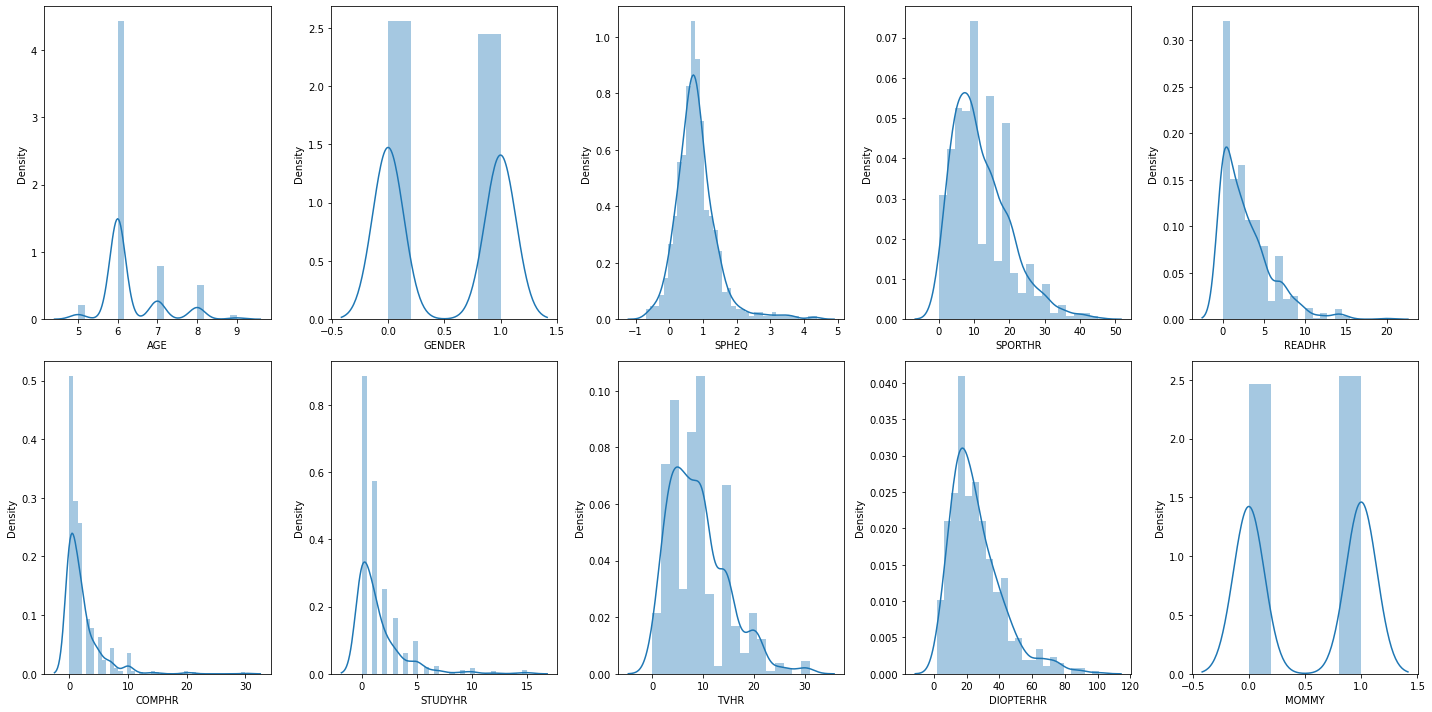

In [6]:
rows=2
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,10))
col=df.columns
index=1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout();


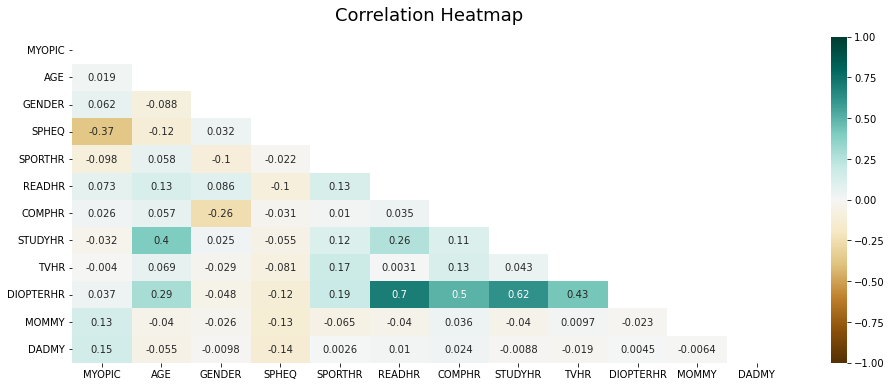

In [7]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

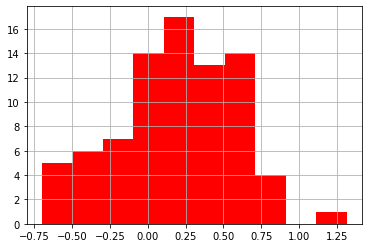

In [8]:
df[df['MYOPIC'] == 1]['SPHEQ'].hist(color="red");

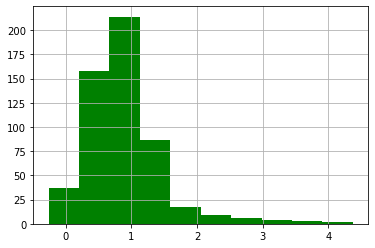

In [9]:
df[df['MYOPIC'] == 0]['SPHEQ'].hist(color="green");

In [10]:
df.describe()

,MYOPIC,AGE,GENDER,SPHEQ,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,0.131068,6.299353,0.488673,0.801010,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382
std,0.337748,0.712950,0.500277,0.625918,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402
min,0.000000,5.000000,0.000000,-0.699000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.456250,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,0.729000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000
75%,0.000000,6.000000,1.000000,1.034000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000
max,1.000000,9.000000,1.000000,4.372000,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000


In [11]:
df_f1 = pd.DataFrame(columns = ['log_f1', 'log_prec', 'log_rec', 
                                'knn_f1', 'knn_prec', 'knn_rec', 
                                'tree_f1', 'tree_prec', 'tree_rec', 
                                'rnd_f1', 'rnd_prec', 'rnd_rec',
                               'svm_f1', 'svm_prec', 'svm_rec',
                               'ada_f1', 'ada_prec', 'ada_rec',
                               'gaus_f1', 'gaus_prec', 'gaus_rec',
                               'bag_f1', 'bag_prec', 'bag_rec',
                               'stac_f1', 'stac_prec', 'stac_rec'])


def learn_save(X_train, X_test, Y_train, Y_test):
    
    
    
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)

    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)

    ada = AdaBoostClassifier()
    ada.fit(X_train, Y_train)

    bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
    bag_clf.fit(X_train, Y_train)

    Randomforest = RandomForestClassifier(n_estimators = 100, random_state = 50)
    Randomforest.fit(X_train, Y_train)

    tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    tree_clf.fit(X_train, Y_train)



    base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('rf_2', KNeighborsClassifier(n_neighbors=5))             
                ]
    stac_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
    stac_clf.fit(X_train, Y_train)

    g_clf = GaussianNB()
    g_clf.fit(X_train, Y_train)


    svm_clf = SVC(kernel = 'rbf')
    svm_clf.fit(X_train, Y_train)
    
    
    new_row = {'log_f1': f1_score(lr.predict(X_test), Y_test),
           'log_prec': precision_score(lr.predict(X_test), Y_test),
           'log_rec': recall_score(lr.predict(X_test), Y_test),                   
           
           'knn_f1': f1_score(knn.predict(X_test), Y_test), 
           'knn_prec': precision_score(knn.predict(X_test), Y_test),
           'knn_rec': recall_score(knn.predict(X_test), Y_test),
           
           'tree_f1': f1_score(tree_clf.predict(X_test), Y_test), 
           'tree_prec': precision_score(tree_clf.predict(X_test), Y_test),
           'tree_rec': recall_score(tree_clf.predict(X_test), Y_test),
                     
           'rnd_f1': f1_score(Randomforest.predict(X_test), Y_test),
           'rnd_prec': precision_score(Randomforest.predict(X_test), Y_test),
           'rnd_rec': recall_score(Randomforest.predict(X_test), Y_test),
           
                     
           'svm_f1': f1_score(svm_clf.predict(X_test), Y_test),
           'svm_prec': precision_score(svm_clf.predict(X_test), Y_test),
           'svm_rec': recall_score(svm_clf.predict(X_test), Y_test),
           
           'ada_f1': f1_score(ada.predict(X_test), Y_test),         
           'ada_prec': precision_score(ada.predict(X_test), Y_test),
           'ada_rec': recall_score(ada.predict(X_test), Y_test),
           
           
           'gaus_f1': f1_score(g_clf.predict(X_test), Y_test),         
           'gaus_prec': precision_score(g_clf.predict(X_test), Y_test),
           'gaus_rec': recall_score(g_clf.predict(X_test), Y_test),
                   
           'bag_f1': f1_score(bag_clf.predict(X_test), Y_test),
           'bag_prec': precision_score(bag_clf.predict(X_test), Y_test),
           'bag_rec': recall_score(bag_clf.predict(X_test), Y_test),
           
           'stac_f1': f1_score(stac_clf.predict(X_test), Y_test), 
           'stac_prec': precision_score(stac_clf.predict(X_test), Y_test),
           'stac_rec': recall_score(stac_clf.predict(X_test), Y_test),
           
          }
  
    return new_row

# learn_save(X_train, X_test, Y_train, Y_test)
# new_row = pd.Series(new_row,index=df_f1.columns, name='Experiment_1')
# df_f1 = df_f1.append(new_row)

###  Без изменений, только Standard scaler

In [12]:
X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sc = StandardScaler() 
X = sc.fit_transform (X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [13]:
new_row = learn_save(X_train, X_test, Y_train, Y_test)

In [14]:
new_row = pd.Series(new_row,index=df_f1.columns, name='Experiment_1')
df_f1 = df_f1.append(new_row)

In [15]:
df_f1

,log_f1,log_prec,log_rec,knn_f1,knn_prec,knn_rec,tree_f1,tree_prec,tree_rec,rnd_f1,...,ada_rec,gaus_f1,gaus_prec,gaus_rec,bag_f1,bag_prec,bag_rec,stac_f1,stac_prec,stac_rec
Experiment_1,0.388889,0.28,0.636364,0.068966,0.04,0.25,0.25,0.16,0.571429,0.3125,...,0.538462,0.242424,0.16,0.5,0.258065,0.16,0.666667,0.068966,0.04,0.25


### Убрать отклоняющиеся значения

In [16]:
df = pd.read_csv("myopia.csv", sep=";")
df.drop(['ID','STUDYYEAR', 'AL', 'ACD', 'LT', 'VCD'], axis = 1, inplace = True)

In [17]:
df.describe()

,MYOPIC,AGE,GENDER,SPHEQ,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,0.131068,6.299353,0.488673,0.801010,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382
std,0.337748,0.712950,0.500277,0.625918,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402
min,0.000000,5.000000,0.000000,-0.699000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.456250,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,0.729000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000
75%,0.000000,6.000000,1.000000,1.034000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000
max,1.000000,9.000000,1.000000,4.372000,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000


In [18]:
def IQR_COL(column):
    Q1 = np.percentile(df[column], 25,
                   interpolation = 'linear')
    Q3 = np.percentile(df[column], 75,
                   interpolation = 'linear')
    IQR = Q3 - Q1

    return column, IQR, Q1, Q3


li = ['SPHEQ',
 'SPORTHR',
 'READHR',
 'COMPHR',
 'STUDYHR',
 'TVHR',
 'DIOPTERHR']
lis = []
for i in li:
    a = IQR_COL(i)
    lis.append(a)
    
    
def replace_upper_row(tup):
    column = tup[0]
    IQR = tup[1]
    Q1 = tup[2]
    Q3 = tup[3]
    df.loc[df[column] >= Q3+1.5*IQR, column] = Q3+1.5*IQR
    
    
def replace_lower_row(tup):
    column = tup[0]
    IQR = tup[1]
    Q1 = tup[2]
    Q3 = tup[3]
    df.loc[df[column] <= Q1-1.5*IQR, column] = Q1-1.5*IQR
    
for i in lis:
    replace_upper_row (i)
    replace_lower_row(i)

In [19]:
df.describe()

,MYOPIC,AGE,GENDER,SPHEQ,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,0.131068,6.299353,0.488673,0.765577,11.825243,2.710356,1.885922,1.307443,8.875202,25.521845,0.506472,0.498382
std,0.337748,0.712950,0.500277,0.501992,7.585827,2.782544,2.200157,1.570383,5.491288,14.526813,0.500363,0.500402
min,0.000000,5.000000,0.000000,-0.410375,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.456250,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,0.729000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000
75%,0.000000,6.000000,1.000000,1.034000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000
max,1.000000,9.000000,1.000000,1.900625,31.000000,10.000000,7.500000,5.000000,23.625000,62.500000,1.000000,1.000000


In [20]:
X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sc = StandardScaler() 
X = sc.fit_transform (X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

new_row = learn_save(X_train, X_test, Y_train, Y_test)

In [21]:
new_row = pd.Series(new_row,index=df_f1.columns, name='Experiment_2')
df_f1 = df_f1.append(new_row)
df_f1

,log_f1,log_prec,log_rec,knn_f1,knn_prec,knn_rec,tree_f1,tree_prec,tree_rec,rnd_f1,...,ada_rec,gaus_f1,gaus_prec,gaus_rec,bag_f1,bag_prec,bag_rec,stac_f1,stac_prec,stac_rec
Experiment_1,0.388889,0.28,0.636364,0.068966,0.04,0.25,0.25,0.16,0.571429,0.312500,...,0.538462,0.242424,0.16,0.5,0.258065,0.16,0.666667,0.068966,0.04,0.25
Experiment_2,0.388889,0.28,0.636364,0.068966,0.04,0.25,0.25,0.16,0.571429,0.258065,...,0.583333,0.400000,0.28,0.7,0.258065,0.16,0.666667,0.137931,0.08,0.50


### Новые признаки

In [22]:
df = pd.read_csv("myopia.csv", sep=";")
df.drop(['ID','STUDYYEAR', 'AL', 'ACD', 'LT', 'VCD'], axis = 1, inplace = True)

In [23]:
df.loc[(df['MOMMY'] == 1) & (df['DADMY'] ==1), 'BOTH'] = '1'
df.loc[(df['MOMMY'] == 0) & (df['DADMY'] ==0), 'NONE_PAR'] = '1'
df = df.fillna(0)
df.BOTH = df.BOTH.astype(int)
df.NONE_PAR = df.NONE_PAR.astype(int)

In [24]:
X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sc = StandardScaler() 
X = sc.fit_transform (X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

new_row = learn_save(X_train, X_test, Y_train, Y_test)

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.


In [25]:
new_row = learn_save(X_train, X_test, Y_train, Y_test)
new_row = pd.Series(new_row,index=df_f1.columns, name='Experiment_3')
df_f1 = df_f1.append(new_row)
df_f1

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.


,log_f1,log_prec,log_rec,knn_f1,knn_prec,knn_rec,tree_f1,tree_prec,tree_rec,rnd_f1,...,ada_rec,gaus_f1,gaus_prec,gaus_rec,bag_f1,bag_prec,bag_rec,stac_f1,stac_prec,stac_rec
Experiment_1,0.388889,0.28,0.636364,0.068966,0.04,0.25,0.25,0.16,0.571429,0.312500,...,0.538462,0.242424,0.16,0.500000,0.258065,0.16,0.666667,0.068966,0.04,0.25
Experiment_2,0.388889,0.28,0.636364,0.068966,0.04,0.25,0.25,0.16,0.571429,0.258065,...,0.583333,0.400000,0.28,0.700000,0.258065,0.16,0.666667,0.137931,0.08,0.50
Experiment_3,0.388889,0.28,0.636364,0.066667,0.04,0.20,0.25,0.16,0.571429,0.258065,...,0.538462,0.425532,0.40,0.454545,0.258065,0.16,0.666667,0.000000,0.00,0.00


In [26]:
df['FREEHR'] = 105 - df['READHR'] - df['COMPHR'] - df['STUDYHR'] - df['TVHR']

In [27]:
X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sc = StandardScaler() 
X = sc.fit_transform (X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

new_row = learn_save(X_train, X_test, Y_train, Y_test)

In [28]:
new_row = learn_save(X_train, X_test, Y_train, Y_test)
new_row = pd.Series(new_row,index=df_f1.columns, name='Experiment_4')
df_f1 = df_f1.append(new_row)
df_f1

,log_f1,log_prec,log_rec,knn_f1,knn_prec,knn_rec,tree_f1,tree_prec,tree_rec,rnd_f1,...,ada_rec,gaus_f1,gaus_prec,gaus_rec,bag_f1,bag_prec,bag_rec,stac_f1,stac_prec,stac_rec
Experiment_1,0.388889,0.28,0.636364,0.068966,0.04,0.250,0.25,0.16,0.571429,0.312500,...,0.538462,0.242424,0.16,0.500000,0.258065,0.16,0.666667,0.068966,0.04,0.250000
Experiment_2,0.388889,0.28,0.636364,0.068966,0.04,0.250,0.25,0.16,0.571429,0.258065,...,0.583333,0.400000,0.28,0.700000,0.258065,0.16,0.666667,0.137931,0.08,0.500000
Experiment_3,0.388889,0.28,0.636364,0.066667,0.04,0.200,0.25,0.16,0.571429,0.258065,...,0.538462,0.425532,0.40,0.454545,0.258065,0.16,0.666667,0.000000,0.00,0.000000
Experiment_4,0.388889,0.28,0.636364,0.060606,0.04,0.125,0.25,0.16,0.571429,0.312500,...,0.555556,0.425532,0.40,0.454545,0.258065,0.16,0.666667,0.071429,0.04,0.333333


### SMOTE

In [29]:
df = pd.read_csv("myopia.csv", sep=";")
df.drop(['ID','STUDYYEAR', 'AL', 'ACD', 'LT', 'VCD'], axis = 1, inplace = True)

X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 5)

new_row = learn_save(X_train, X_test, Y_train, Y_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [30]:
new_row = learn_save(X_train, X_test, Y_train, Y_test)
new_row = pd.Series(new_row,index=df_f1.columns, name='Experiment_5')
df_f1 = df_f1.append(new_row)
df_f1

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,log_f1,log_prec,log_rec,knn_f1,knn_prec,knn_rec,tree_f1,tree_prec,tree_rec,rnd_f1,...,ada_rec,gaus_f1,gaus_prec,gaus_rec,bag_f1,bag_prec,bag_rec,stac_f1,stac_prec,stac_rec
Experiment_1,0.388889,0.280000,0.636364,0.068966,0.040000,0.25000,0.250000,0.160000,0.571429,0.312500,...,0.538462,0.242424,0.160000,0.500000,0.258065,0.160000,0.666667,0.068966,0.040000,0.250000
Experiment_2,0.388889,0.280000,0.636364,0.068966,0.040000,0.25000,0.250000,0.160000,0.571429,0.258065,...,0.583333,0.400000,0.280000,0.700000,0.258065,0.160000,0.666667,0.137931,0.080000,0.500000
Experiment_3,0.388889,0.280000,0.636364,0.066667,0.040000,0.20000,0.250000,0.160000,0.571429,0.258065,...,0.538462,0.425532,0.400000,0.454545,0.258065,0.160000,0.666667,0.000000,0.000000,0.000000
Experiment_4,0.388889,0.280000,0.636364,0.060606,0.040000,0.12500,0.250000,0.160000,0.571429,0.312500,...,0.555556,0.425532,0.400000,0.454545,0.258065,0.160000,0.666667,0.071429,0.040000,0.333333
Experiment_5,0.889908,0.881818,0.898148,0.809524,0.927273,0.71831,0.796875,0.927273,0.698630,0.895652,...,0.798319,0.781116,0.827273,0.739837,0.833333,0.909091,0.769231,0.931507,0.927273,0.935780


## SMOTE + StandardScaler

In [31]:
df = pd.read_csv("myopia.csv", sep=";")
df.drop(['ID','STUDYYEAR', 'AL', 'ACD', 'LT', 'VCD'], axis = 1, inplace = True)

X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_resample(X, Y)

sc = StandardScaler() 
X_res = sc.fit_transform (X_res)

X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 5)

new_row = learn_save(X_train, X_test, Y_train, Y_test)

In [32]:
new_row = learn_save(X_train, X_test, Y_train, Y_test)
new_row = pd.Series(new_row,index=df_f1.columns, name='Experiment_6')
df_f1 = df_f1.append(new_row)
df_f1

,log_f1,log_prec,log_rec,knn_f1,knn_prec,knn_rec,tree_f1,tree_prec,tree_rec,rnd_f1,...,ada_rec,gaus_f1,gaus_prec,gaus_rec,bag_f1,bag_prec,bag_rec,stac_f1,stac_prec,stac_rec
Experiment_1,0.388889,0.280000,0.636364,0.068966,0.040000,0.250000,0.250000,0.160000,0.571429,0.312500,...,0.538462,0.242424,0.160000,0.500000,0.258065,0.160000,0.666667,0.068966,0.040000,0.250000
Experiment_2,0.388889,0.280000,0.636364,0.068966,0.040000,0.250000,0.250000,0.160000,0.571429,0.258065,...,0.583333,0.400000,0.280000,0.700000,0.258065,0.160000,0.666667,0.137931,0.080000,0.500000
Experiment_3,0.388889,0.280000,0.636364,0.066667,0.040000,0.200000,0.250000,0.160000,0.571429,0.258065,...,0.538462,0.425532,0.400000,0.454545,0.258065,0.160000,0.666667,0.000000,0.000000,0.000000
Experiment_4,0.388889,0.280000,0.636364,0.060606,0.040000,0.125000,0.250000,0.160000,0.571429,0.312500,...,0.555556,0.425532,0.400000,0.454545,0.258065,0.160000,0.666667,0.071429,0.040000,0.333333
Experiment_5,0.889908,0.881818,0.898148,0.809524,0.927273,0.718310,0.796875,0.927273,0.698630,0.895652,...,0.798319,0.781116,0.827273,0.739837,0.833333,0.909091,0.769231,0.931507,0.927273,0.935780
Experiment_6,0.863248,0.918182,0.814516,0.825000,0.900000,0.761538,0.796875,0.927273,0.698630,0.895652,...,0.798319,0.781116,0.827273,0.739837,0.833333,0.909091,0.769231,0.923077,0.927273,0.918919


## SMOTE + SC + NEW_FEAT

In [33]:
df = pd.read_csv("myopia.csv", sep=";")
df.drop(['ID','STUDYYEAR', 'AL', 'ACD', 'LT', 'VCD'], axis = 1, inplace = True)



In [34]:
df['READHR_class'] = pd.cut(df.READHR, bins = [0, 2, 4, 7, 21], labels = ['1', '2', '3', '4'], include_lowest = True).astype(int)

In [ ]:
df['SPHEQ_class'] = pd.cut(df.SPHEQ, bins = [-1, 0, 0.7, 1.4, 5], labels = ['1', '2', '3','4'], include_lowest = True,  right = True).astype(int)

In [35]:
X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_resample(X, Y)

sc = StandardScaler() 
X_res = sc.fit_transform (X_res)

X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 5)

new_row = learn_save(X_train, X_test, Y_train, Y_test)

In [36]:
new_row = pd.Series(new_row,index=df_f1.columns, name='Experiment_7')
df_f1 = df_f1.append(new_row)
df_f1

,log_f1,log_prec,log_rec,knn_f1,knn_prec,knn_rec,tree_f1,tree_prec,tree_rec,rnd_f1,...,ada_rec,gaus_f1,gaus_prec,gaus_rec,bag_f1,bag_prec,bag_rec,stac_f1,stac_prec,stac_rec
Experiment_1,0.388889,0.280000,0.636364,0.068966,0.040000,0.250000,0.250000,0.160000,0.571429,0.312500,...,0.538462,0.242424,0.160000,0.500000,0.258065,0.160000,0.666667,0.068966,0.040000,0.250000
Experiment_2,0.388889,0.280000,0.636364,0.068966,0.040000,0.250000,0.250000,0.160000,0.571429,0.258065,...,0.583333,0.400000,0.280000,0.700000,0.258065,0.160000,0.666667,0.137931,0.080000,0.500000
Experiment_3,0.388889,0.280000,0.636364,0.066667,0.040000,0.200000,0.250000,0.160000,0.571429,0.258065,...,0.538462,0.425532,0.400000,0.454545,0.258065,0.160000,0.666667,0.000000,0.000000,0.000000
Experiment_4,0.388889,0.280000,0.636364,0.060606,0.040000,0.125000,0.250000,0.160000,0.571429,0.312500,...,0.555556,0.425532,0.400000,0.454545,0.258065,0.160000,0.666667,0.071429,0.040000,0.333333
Experiment_5,0.889908,0.881818,0.898148,0.809524,0.927273,0.718310,0.796875,0.927273,0.698630,0.895652,...,0.798319,0.781116,0.827273,0.739837,0.833333,0.909091,0.769231,0.931507,0.927273,0.935780
Experiment_6,0.863248,0.918182,0.814516,0.825000,0.900000,0.761538,0.796875,0.927273,0.698630,0.895652,...,0.798319,0.781116,0.827273,0.739837,0.833333,0.909091,0.769231,0.923077,0.927273,0.918919
Experiment_7,0.855895,0.890909,0.823529,0.828452,0.900000,0.767442,0.796875,0.927273,0.698630,0.895652,...,0.808333,0.786325,0.836364,0.741935,0.833333,0.909091,0.769231,0.909091,0.909091,0.909091


## SMOTE + ALL NEW FEATURES Without scaler

In [37]:
df = pd.read_csv("myopia.csv", sep=";")
df.drop(['ID','STUDYYEAR', 'AL', 'ACD', 'LT', 'VCD'], axis = 1, inplace = True)

df['READHR_class'] = pd.cut(df.READHR, bins = [0, 2, 4, 7, 21], labels = ['1', '2', '3', '4'], include_lowest = True).astype(int)

In [38]:
df['FREEHR'] = 105 - df['READHR'] - df['COMPHR'] - df['STUDYHR'] - df['TVHR']

In [39]:
df.loc[(df['MOMMY'] == 1) & (df['DADMY'] ==1), 'BOTH'] = '1'
df.loc[(df['MOMMY'] == 0) & (df['DADMY'] ==0), 'NONE_PAR'] = '1'
df = df.fillna(0)
df.BOTH = df.BOTH.astype(int)
df.NONE_PAR = df.NONE_PAR.astype(int)

In [40]:
X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 5)

new_row = learn_save(X_train, X_test, Y_train, Y_test)

new_row = learn_save(X_train, X_test, Y_train, Y_test)
new_row = pd.Series(new_row,index=df_f1.columns, name='Experiment_8')
df_f1 = df_f1.append(new_row)
df_f1

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,log_f1,log_prec,log_rec,knn_f1,knn_prec,knn_rec,tree_f1,tree_prec,tree_rec,rnd_f1,...,ada_rec,gaus_f1,gaus_prec,gaus_rec,bag_f1,bag_prec,bag_rec,stac_f1,stac_prec,stac_rec
Experiment_1,0.388889,0.280000,0.636364,0.068966,0.040000,0.250000,0.250000,0.160000,0.571429,0.312500,...,0.538462,0.242424,0.160000,0.500000,0.258065,0.160000,0.666667,0.068966,0.040000,0.250000
Experiment_2,0.388889,0.280000,0.636364,0.068966,0.040000,0.250000,0.250000,0.160000,0.571429,0.258065,...,0.583333,0.400000,0.280000,0.700000,0.258065,0.160000,0.666667,0.137931,0.080000,0.500000
Experiment_3,0.388889,0.280000,0.636364,0.066667,0.040000,0.200000,0.250000,0.160000,0.571429,0.258065,...,0.538462,0.425532,0.400000,0.454545,0.258065,0.160000,0.666667,0.000000,0.000000,0.000000
Experiment_4,0.388889,0.280000,0.636364,0.060606,0.040000,0.125000,0.250000,0.160000,0.571429,0.312500,...,0.555556,0.425532,0.400000,0.454545,0.258065,0.160000,0.666667,0.071429,0.040000,0.333333
Experiment_5,0.889908,0.881818,0.898148,0.809524,0.927273,0.718310,0.796875,0.927273,0.698630,0.895652,...,0.798319,0.781116,0.827273,0.739837,0.833333,0.909091,0.769231,0.931507,0.927273,0.935780
Experiment_6,0.863248,0.918182,0.814516,0.825000,0.900000,0.761538,0.796875,0.927273,0.698630,0.895652,...,0.798319,0.781116,0.827273,0.739837,0.833333,0.909091,0.769231,0.923077,0.927273,0.918919
Experiment_7,0.855895,0.890909,0.823529,0.828452,0.900000,0.767442,0.796875,0.927273,0.698630,0.895652,...,0.808333,0.786325,0.836364,0.741935,0.833333,0.909091,0.769231,0.909091,0.909091,0.909091
Experiment_8,0.894009,0.881818,0.906542,0.819277,0.927273,0.733813,0.803213,0.909091,0.719424,0.895652,...,0.826087,0.793774,0.927273,0.693878,0.840336,0.909091,0.781250,0.883929,0.900000,0.868421


## SMOTE + NEW FEATURES + Replace IQL

In [41]:
df = pd.read_csv("myopia.csv", sep=";")
df.drop(['ID','STUDYYEAR', 'AL', 'ACD', 'LT', 'VCD'], axis = 1, inplace = True)

df['READHR_class'] = pd.cut(df.READHR, bins = [0, 2, 4, 7, 21], labels = ['1', '2', '3', '4'], include_lowest = True).astype(int)

df['FREEHR'] = 105 - df['READHR'] - df['COMPHR'] - df['STUDYHR'] - df['TVHR']
df.loc[(df['MOMMY'] == 1) & (df['DADMY'] ==1), 'BOTH'] = '1'
df.loc[(df['MOMMY'] == 0) & (df['DADMY'] ==0), 'NONE_PAR'] = '1'
df = df.fillna(0)
df.BOTH = df.BOTH.astype(int)
df.NONE_PAR = df.NONE_PAR.astype(int)

In [42]:
def IQR_COL(column):
    Q1 = np.percentile(df[column], 25,
                   interpolation = 'linear')
    Q3 = np.percentile(df[column], 75,
                   interpolation = 'linear')
    IQR = Q3 - Q1

    return column, IQR, Q1, Q3


li = ['SPHEQ',
 'SPORTHR',
 'READHR',
 'COMPHR',
 'STUDYHR',
 'TVHR',
 'DIOPTERHR']
lis = []
for i in li:
    a = IQR_COL(i)
    lis.append(a)
    
    
def replace_upper_row(tup):
    column = tup[0]
    IQR = tup[1]
    Q1 = tup[2]
    Q3 = tup[3]
    df.loc[df[column] >= Q3+1.5*IQR, column] = Q3+1.5*IQR
    
    
def replace_lower_row(tup):
    column = tup[0]
    IQR = tup[1]
    Q1 = tup[2]
    Q3 = tup[3]
    df.loc[df[column] <= Q1-1.5*IQR, column] = Q1-1.5*IQR
    
for i in lis:
    replace_upper_row (i)
    replace_lower_row(i)

In [43]:
X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 5)

new_row = learn_save(X_train, X_test, Y_train, Y_test)

new_row = pd.Series(new_row,index=df_f1.columns, name='Experiment_9')
df_f1 = df_f1.append(new_row)
df_f1

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,log_f1,log_prec,log_rec,knn_f1,knn_prec,knn_rec,tree_f1,tree_prec,tree_rec,rnd_f1,...,ada_rec,gaus_f1,gaus_prec,gaus_rec,bag_f1,bag_prec,bag_rec,stac_f1,stac_prec,stac_rec
Experiment_1,0.388889,0.280000,0.636364,0.068966,0.040000,0.250000,0.250000,0.160000,0.571429,0.312500,...,0.538462,0.242424,0.160000,0.500000,0.258065,0.160000,0.666667,0.068966,0.040000,0.250000
Experiment_2,0.388889,0.280000,0.636364,0.068966,0.040000,0.250000,0.250000,0.160000,0.571429,0.258065,...,0.583333,0.400000,0.280000,0.700000,0.258065,0.160000,0.666667,0.137931,0.080000,0.500000
Experiment_3,0.388889,0.280000,0.636364,0.066667,0.040000,0.200000,0.250000,0.160000,0.571429,0.258065,...,0.538462,0.425532,0.400000,0.454545,0.258065,0.160000,0.666667,0.000000,0.000000,0.000000
Experiment_4,0.388889,0.280000,0.636364,0.060606,0.040000,0.125000,0.250000,0.160000,0.571429,0.312500,...,0.555556,0.425532,0.400000,0.454545,0.258065,0.160000,0.666667,0.071429,0.040000,0.333333
Experiment_5,0.889908,0.881818,0.898148,0.809524,0.927273,0.718310,0.796875,0.927273,0.698630,0.895652,...,0.798319,0.781116,0.827273,0.739837,0.833333,0.909091,0.769231,0.931507,0.927273,0.935780
Experiment_6,0.863248,0.918182,0.814516,0.825000,0.900000,0.761538,0.796875,0.927273,0.698630,0.895652,...,0.798319,0.781116,0.827273,0.739837,0.833333,0.909091,0.769231,0.923077,0.927273,0.918919
Experiment_7,0.855895,0.890909,0.823529,0.828452,0.900000,0.767442,0.796875,0.927273,0.698630,0.895652,...,0.808333,0.786325,0.836364,0.741935,0.833333,0.909091,0.769231,0.909091,0.909091,0.909091
Experiment_8,0.894009,0.881818,0.906542,0.819277,0.927273,0.733813,0.803213,0.909091,0.719424,0.895652,...,0.826087,0.793774,0.927273,0.693878,0.840336,0.909091,0.781250,0.883929,0.900000,0.868421
Experiment_9,0.825112,0.836364,0.814159,0.817814,0.918182,0.737226,0.803213,0.909091,0.719424,0.897778,...,0.855856,0.818533,0.963636,0.711409,0.843882,0.909091,0.787402,0.946429,0.963636,0.929825


In [44]:
df_f1.T.style.highlight_max(color = '#40E0D0', axis = 0).highlight_min(color = 'pink', axis = 0)

,Experiment_1,Experiment_2,Experiment_3,Experiment_4,Experiment_5,Experiment_6,Experiment_7,Experiment_8,Experiment_9
log_f1,0.388889,0.388889,0.388889,0.388889,0.889908,0.863248,0.855895,0.894009,0.825112
log_prec,0.280000,0.280000,0.280000,0.280000,0.881818,0.918182,0.890909,0.881818,0.836364
log_rec,0.636364,0.636364,0.636364,0.636364,0.898148,0.814516,0.823529,0.906542,0.814159
knn_f1,0.068966,0.068966,0.066667,0.060606,0.809524,0.825000,0.828452,0.819277,0.817814
knn_prec,0.040000,0.040000,0.040000,0.040000,0.927273,0.900000,0.900000,0.927273,0.918182
knn_rec,0.250000,0.250000,0.200000,0.125000,0.718310,0.761538,0.767442,0.733813,0.737226
tree_f1,0.250000,0.250000,0.250000,0.250000,0.796875,0.796875,0.796875,0.803213,0.803213
tree_prec,0.160000,0.160000,0.160000,0.160000,0.927273,0.927273,0.927273,0.909091,0.909091
tree_rec,0.571429,0.571429,0.571429,0.571429,0.698630,0.698630,0.698630,0.719424,0.719424
rnd_f1,0.312500,0.258065,0.258065,0.312500,0.895652,0.895652,0.895652,0.895652,0.897778


## Нейросети

входной слой, 5 скрытых слоев, выходной слой;\
на выходе 1 нейрон \
функции активации - "relu" и "softmax" (стандарт);\
функция потерь - "binary_crossentropy";\
метрика качества - "accuracy" (стандарт);\
оптимизатор - "adam" (стандарт);\
Dropout(0.4)\
размер батча - 32 (надо с чего-то начинать);\
размер валидационной выборки - 20% (стандарт).

In [45]:

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [46]:
df = pd.read_csv("myopia.csv", sep=";")
df.drop(['ID','STUDYYEAR', 'AL', 'ACD', 'LT', 'VCD'], axis = 1, inplace = True)

def IQR_COL(column):
    Q1 = np.percentile(df[column], 25,
                   interpolation = 'linear')
    Q3 = np.percentile(df[column], 75,
                   interpolation = 'linear')
    IQR = Q3 - Q1

    return column, IQR, Q1, Q3


li = ['SPHEQ',
 'SPORTHR',
 'READHR',
 'COMPHR',
 'STUDYHR',
 'TVHR',
 'DIOPTERHR']
lis = []
for i in li:
    a = IQR_COL(i)
    lis.append(a)
    
    
def replace_upper_row(tup):
    column = tup[0]
    IQR = tup[1]
    Q1 = tup[2]
    Q3 = tup[3]
    df.loc[df[column] >= Q3+1.5*IQR, column] = Q3+1.5*IQR
    
    
def replace_lower_row(tup):
    column = tup[0]
    IQR = tup[1]
    Q1 = tup[2]
    Q3 = tup[3]
    df.loc[df[column] <= Q1-1.5*IQR, column] = Q1-1.5*IQR
    
for i in lis:
    replace_upper_row (i)
    replace_lower_row(i)
    
    
X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_resample(X, Y)

sc = StandardScaler() 
X_res = sc.fit_transform (X_res)


X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 5)



In [47]:
model = models.Sequential()

model.add(layers.Dense(768, activation="elu", input_shape = (X_train.shape[1],), 
#                        kernel_regularizer=tf.keras.regularizers.l2(0.002),
                       ))  
# model.add(layers.Dropout(0.4))

# model.add(layers.Dense(768, activation="elu"))
model.add(layers.Dense(384, activation="elu"))
model.add(layers.Dense(256, activation="elu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
# model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


# model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
#               loss="binary_crossentropy",
#               metrics=["accuracy"])


model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss="binary_crossentropy",
              metrics=["accuracy", f1_m,precision_m, recall_m])


In [51]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), 
                    epochs=300, batch_size=512 )
# callbacks=checkpoint

Epoch 1/300
2/2 [==============================] - 1s 332ms/step - loss: 0.7107 - accuracy: 0.4377 - f1_m: 0.5586 - precision_m: 0.4577 - recall_m: 0.7170 - val_loss: 0.7058 - val_accuracy: 0.4698 - val_f1_m: 0.5929 - val_precision_m: 0.4882 - val_recall_m: 0.7545
Epoch 2/300
2/2 [==============================] - 0s 80ms/step - loss: 0.7069 - accuracy: 0.4668 - f1_m: 0.5842 - precision_m: 0.4796 - recall_m: 0.7469 - val_loss: 0.7023 - val_accuracy: 0.5023 - val_f1_m: 0.6192 - val_precision_m: 0.5088 - val_recall_m: 0.7909
Epoch 3/300
2/2 [==============================] - 0s 41ms/step - loss: 0.7031 - accuracy: 0.4901 - f1_m: 0.6047 - precision_m: 0.4976 - recall_m: 0.7712 - val_loss: 0.6988 - val_accuracy: 0.5395 - val_f1_m: 0.6400 - val_precision_m: 0.5333 - val_recall_m: 0.8000
Epoch 4/300
2/2 [==============================] - 0s 48ms/step - loss: 0.6994 - accuracy: 0.5169 - f1_m: 0.6226 - precision_m: 0.5109 - recall_m: 0.7973 - val_loss: 0.6953 - val_accuracy: 0.5535 - val_f1_m:

## AUTO_ML

In [52]:
automl = AutoMLSearch(X_train=X_train, y_train=Y_train, problem_type='binary')
automl.search()
best_pipeline=automl.best_pipeline
automl.describe_pipeline(automl.rankings.iloc[0]["id"])
best_pipeline.score(X_test, Y_test, objectives=["auc","f1","Precision","Recall"])
automl_auc = AutoMLSearch(X_train=X_train, y_train=Y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()
automl_auc.rankings

	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Decision Tree Classifier w/ Label Encoder + Imputer + Select Columns Transformer may not perform as estimated on unseen data.



******************************************************************************
* XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer *
******************************************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. Select Columns Transformer
	 * columns : [2, 3, 5, 6, 7, 8]
4. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for binary problems.
Total training time (including CV): 1.1 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.944331,0.944331,0.018777,44.43309,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.500000,0.000000,0.00000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [53]:
best_pipeline_auc = automl_auc.best_pipeline
best_pipeline_auc.score(X_test, Y_test,  objectives=["f1"])

OrderedDict([('F1', 0.8558139534883721)])

## Лучший классификатор

In [72]:
df = pd.read_csv("myopia.csv", sep=";")
df.drop(['ID','STUDYYEAR', 'AL', 'ACD', 'LT', 'VCD'], axis = 1, inplace = True)

In [73]:
def IQR_COL(column):
    Q1 = np.percentile(df[column], 25,
                   interpolation = 'linear')
    Q3 = np.percentile(df[column], 75,
                   interpolation = 'linear')
    IQR = Q3 - Q1

    return column, IQR, Q1, Q3


li = ['SPHEQ',
 'SPORTHR',
 'READHR',
 'COMPHR',
 'STUDYHR',
 'TVHR',
 'DIOPTERHR']
lis = []
for i in li:
    a = IQR_COL(i)
    lis.append(a)
    
    
def replace_upper_row(tup):
    column = tup[0]
    IQR = tup[1]
    Q1 = tup[2]
    Q3 = tup[3]
    df.loc[df[column] >= Q3+1.5*IQR, column] = Q3+1.5*IQR
    
    
def replace_lower_row(tup):
    column = tup[0]
    IQR = tup[1]
    Q1 = tup[2]
    Q3 = tup[3]
    df.loc[df[column] <= Q1-1.5*IQR, column] = Q1-1.5*IQR
    
for i in lis:
    replace_upper_row (i)
    replace_lower_row(i)

df.drop(['DIOPTERHR'], axis = 1, inplace = True)    
X = df.drop(['MYOPIC'], axis = 1)
Y = df['MYOPIC']

sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_resample(X, Y)


the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)


In [74]:
X_res['MYOPIC'] = Y_res

In [75]:
X_res['DIOPTERHR'] = 3*(X_res['READHR'] + X_res['STUDYHR'])+ 2* X_res['COMPHR'] + X_res['TVHR']

In [76]:
X_res['FREEHR'] = 105 - X_res['READHR'] - X_res['COMPHR'] - X_res['STUDYHR'] - X_res['TVHR']
X_res.loc[(X_res['MOMMY'] == 1) & (X_res['DADMY'] ==1), 'BOTH'] = '1'
X_res.loc[(X_res['MOMMY'] == 0) & (X_res['DADMY'] ==0), 'NONE_PAR'] = '1'
X_res = X_res.fillna(0)
X_res.BOTH = X_res.BOTH.astype(int)
X_res.NONE_PAR = X_res.NONE_PAR.astype(int)


In [77]:
X = X_res.drop(['MYOPIC'], axis = 1)
Y = X_res['MYOPIC']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)


In [61]:
X_train

,AGE,GENDER,SPHEQ,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,MOMMY,DADMY,DIOPTERHR,FREEHR,BOTH,NONE_PAR
608,6,1,4.372000,5,3,10,2,10,0,1,45,80,0,0
750,6,1,-0.108476,6,17,0,3,7,0,0,67,78,0,1
891,6,1,-0.019227,10,2,2,0,10,1,1,20,91,1,0
798,6,0,0.223614,6,0,0,1,2,1,1,5,102,1,0
219,6,0,0.677000,5,4,10,1,4,1,0,39,86,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,6,1,0.647372,1,2,1,0,2,0,1,10,100,0,0
73,6,0,0.078000,2,0,4,7,10,0,0,39,84,0,1
998,6,0,0.508635,2,1,1,1,3,0,1,11,99,0,0
206,6,1,0.535000,0,7,0,3,6,1,0,36,89,0,0


In [78]:
params = {'n_estimators' : [10, 100, 250, 500],
          'criterion': ['gini', 'entropy'],
          'max_depth' : [1, 5, 10, 25], 
          'min_samples_split' : [2, 5, 10],
          'min_samples_leaf' : [1, 5, 10]
          }
# Set the gridsearch model
grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params, 
                    scoring = 'accuracy',
                    cv = 3, 
                    n_jobs = -1)
# Fit the gridsearch
grid.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 25],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 250, 500]},
             scoring='accuracy')

In [79]:
print(grid.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [80]:
base_learners = [('rf_1', RandomForestClassifier(bootstrap = True,
 ccp_alpha= 0.0,
class_weight = 'balanced',
 criterion = 'gini',
 max_depth = 25,
 max_features= 'sqrt',
 max_leaf_nodes= None,
 max_samples = None,
 min_impurity_decrease= 0.0,
#  min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 500,
 n_jobs= None,
 oob_score= False,
 random_state=None,
 verbose= 0,
 warm_start= False)),
                 
('rf_2', KNeighborsClassifier(n_neighbors=5))] 
                  
                  
stac_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stac_clf.fit(X_train, Y_train)
    
print( 'stac_f1', f1_score(stac_clf.predict(X_test), Y_test), 
      'stac_prec', precision_score(stac_clf.predict(X_test), Y_test),
      'stac_rec', recall_score(stac_clf.predict(X_test), Y_test))
           

stac_f1 0.9244444444444444 stac_prec 0.9454545454545454 stac_rec 0.9043478260869565


In [35]:

with open("model.pkl", "wb") as f:
    pickle.dump(stac_clf, f)


In [36]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

In [47]:

pr = [8,-0,-0.26,22,6,4.27,2,7.05,0,1]


to_predict = pd.DataFrame(columns = ['AGE',
 'GENDER',
 'SPHEQ',
 'SPORTHR',
 'READHR',
 'COMPHR',
 'STUDYHR',
 'TVHR',
 'MOMMY',
 'DADMY'])

new_r = pd.Series(pr,index=to_predict.columns, name='Prognosis')

to_predict = to_predict.append(new_r)

to_predict['DIOPTERHR'] = 3*(to_predict['READHR'] + to_predict['STUDYHR']) + 2 * to_predict['COMPHR'] + 1 * to_predict['TVHR']

to_predict['FREEHR'] = 105 - to_predict['READHR'] - to_predict['COMPHR'] - to_predict['STUDYHR'] - to_predict['TVHR']

to_predict.loc[(to_predict['MOMMY'] == 1) & (to_predict['DADMY'] ==1), 'BOTH'] = '1'
to_predict.loc[(to_predict['MOMMY'] == 0) & (to_predict['DADMY'] ==0), 'NONE_PAR'] = '1'
to_predict = to_predict.fillna(0)
to_predict.BOTH = to_predict.BOTH.astype(int)
to_predict.NONE_PAR = to_predict.NONE_PAR.astype(int)


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [48]:
to_predict

,AGE,GENDER,SPHEQ,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,MOMMY,DADMY,DIOPTERHR,FREEHR,BOTH,NONE_PAR
Prognosis,8.0,0.0,-0.26,22.0,6.0,4.27,2.0,7.05,0.0,1.0,39.59,85.68,0,0


In [49]:

model.predict(to_predict)

array([1], dtype=int64)